# Case Study - Jamboree Education

## Definition of problem

Target: 
- To find probability of getting into the IVY league college.

Steps:
- To observe on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.

#### Importing necessary library

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [109]:
# Data Overview
df=pd.read_csv('Jamboree_Admission.csv')

In [110]:
#check overview of data
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


- To observe on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.

In [111]:
# Tocheck shape of data
df.shape

(500, 9)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [113]:
# Finding Missing values 
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [114]:
# Finding douplicate rows:
df.duplicated().sum()

0

In [115]:
# Finding the mMean median and standard devation for numerical columns
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [116]:
# Value count for categorical column
df['Research'].value_counts(normalize=True)

Research
1    0.56
0    0.44
Name: proportion, dtype: float64

In [117]:
df['University Rating'].value_counts(normalize=True)

University Rating
3    0.324
2    0.252
4    0.210
5    0.146
1    0.068
Name: proportion, dtype: float64

In [118]:
df['SOP'].value_counts(normalize=True)

SOP
4.0    0.178
3.5    0.176
3.0    0.160
2.5    0.128
4.5    0.126
2.0    0.086
5.0    0.084
1.5    0.050
1.0    0.012
Name: proportion, dtype: float64

#### Obervations
- Shape of data is (500,9) where there is no null value id present.
- Categorical column is is already converted in to numerical.
- No duplicate rows present in the data.
- dropped unnecessory columns (Serial no.)
- Mean value is almost equal to 50% percentile

### Univariate Analysis

In [119]:
cat_col= ['University Rating','Research','SOP','LOR ', 'Research']
cont_col = ['GRE Score','TOEFL Score','CGPA','Chance of Admit ']


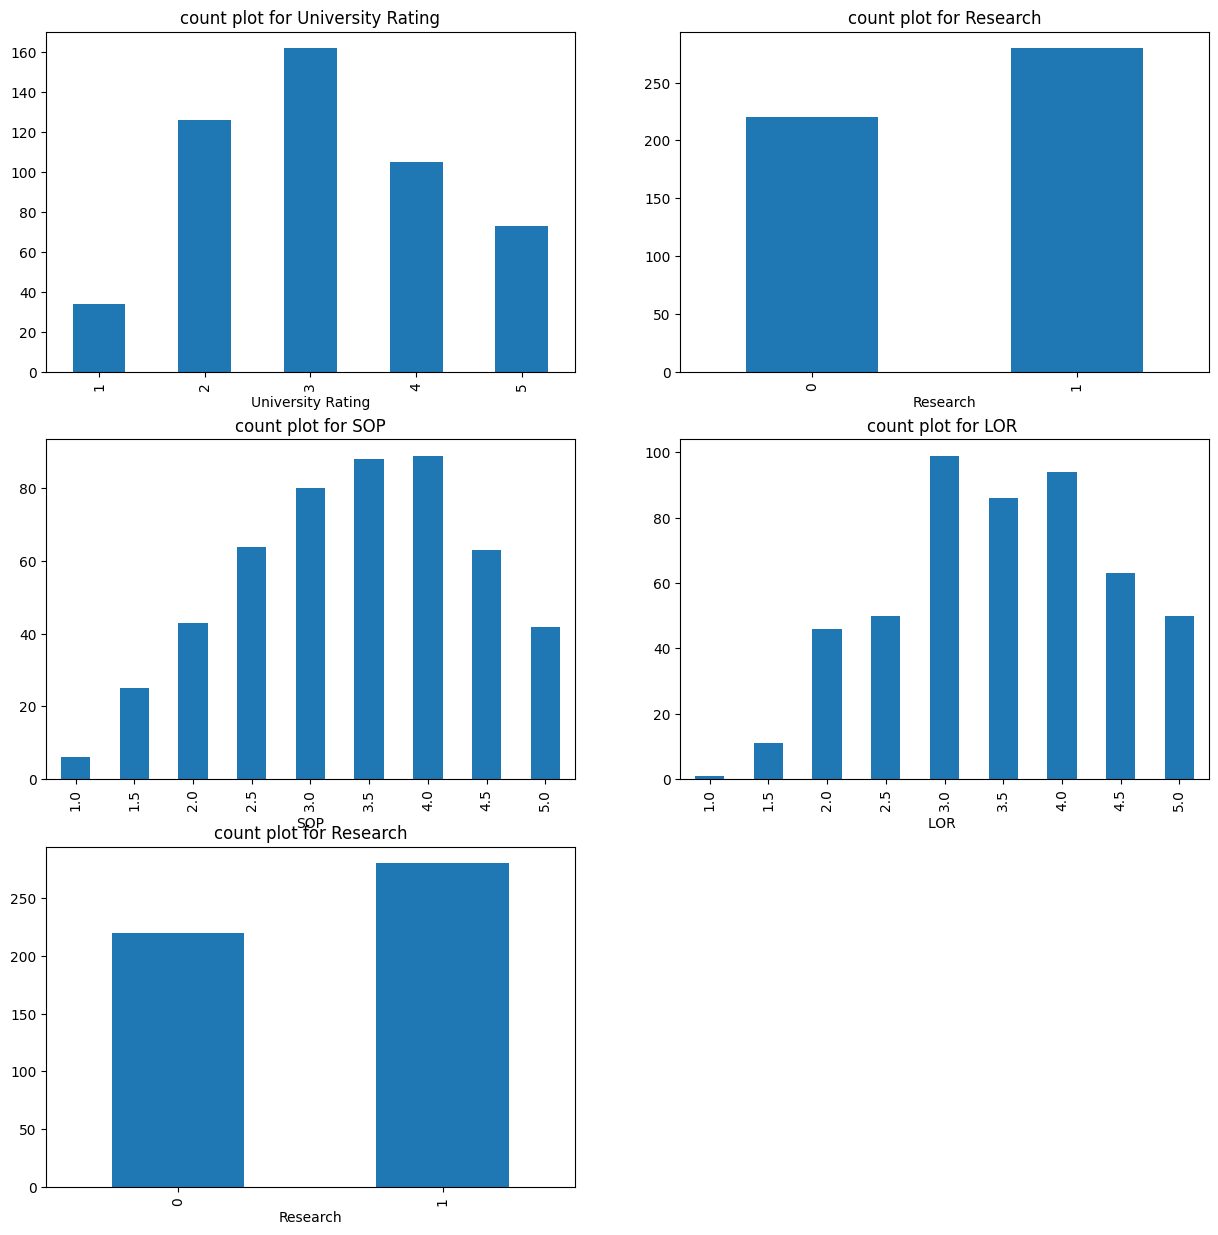

In [120]:
fig=plt.figure(figsize=(15,15))
j=1
for i in cat_col:
    plt.subplot(3,2,j)
    df[i].value_counts().sort_index().plot(kind='bar')
    plt.title(f'count plot for {i}')
    j+=1
plt.show()

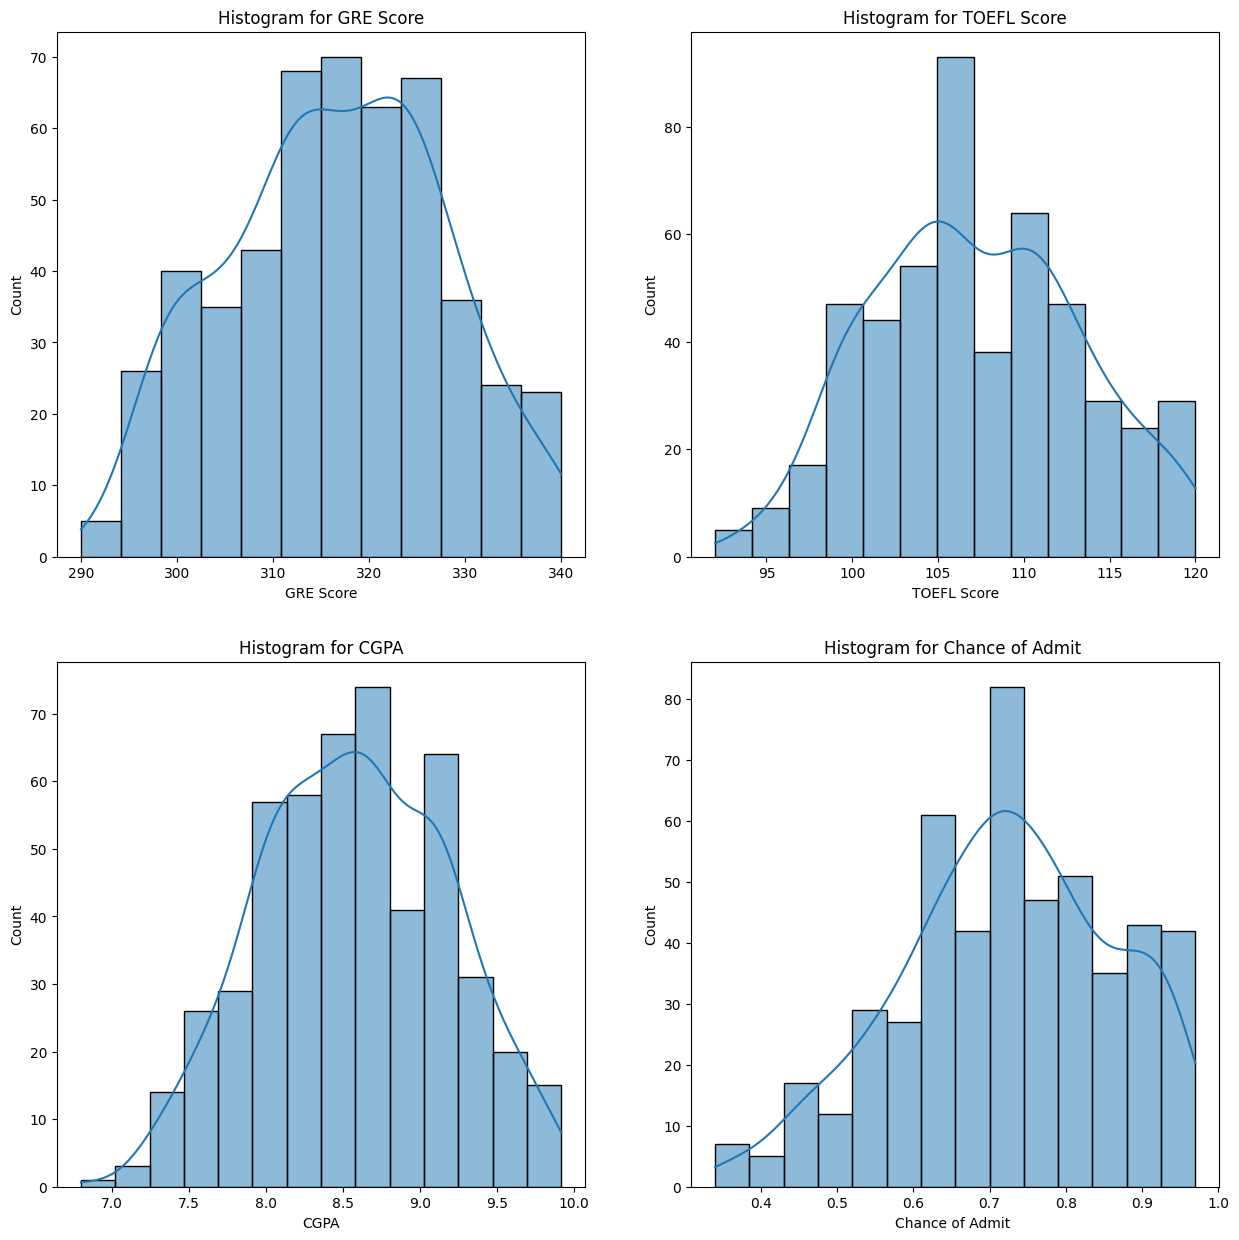

In [121]:
fig=plt.figure(figsize=(15,15))
j=1
for i in cont_col:
    plt.subplot(2,2,j)
    sns.histplot(df[i],kde=True)
    plt.title(f'Histogram for {i}')
    j+=1
plt.show()

## Bivariate Analysis

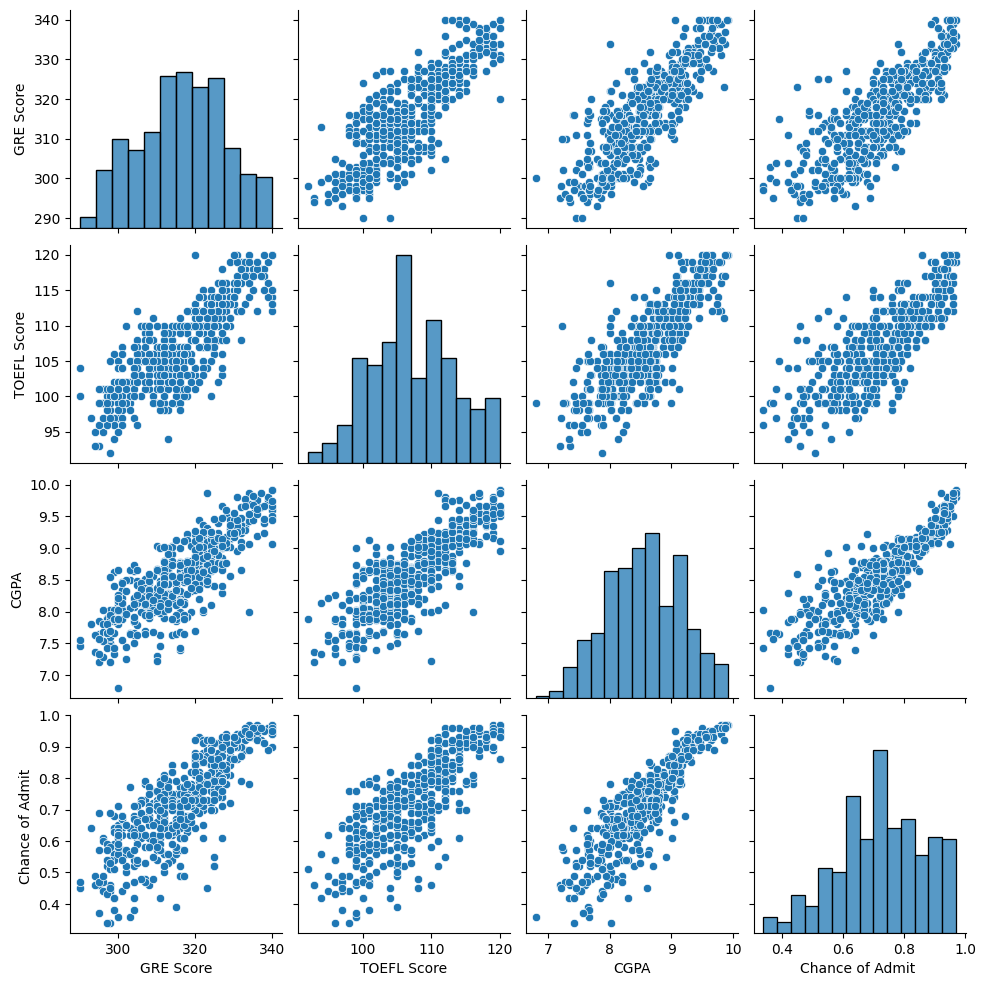

In [122]:
sns.pairplot(df[cont_col])

### Insights:
Figure shows that all continous columns have positive corilation with each other as well as with Target column ('Chance of admit')

### Insights on EDA:
- Shape of data is (500,9) where there is no null value id present.
- Categorical column is is already converted in to numerical.
- No duplicate rows present in the data.
- dropped unnecessory columns (Serial no.)
- Mean value is almost equal to 50% percentile.
- Figure shows that all continous columns have positive corilation with each other as well as with Target column ('Chance of admit')

## Data Preprocessing

#### Duplicate value check

In [123]:
# Finding douplicate rows after removing index:
df.duplicated().sum()

0

#### Missing value treatment

In [124]:
# Finding Missing values 
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#### Outlier treatment

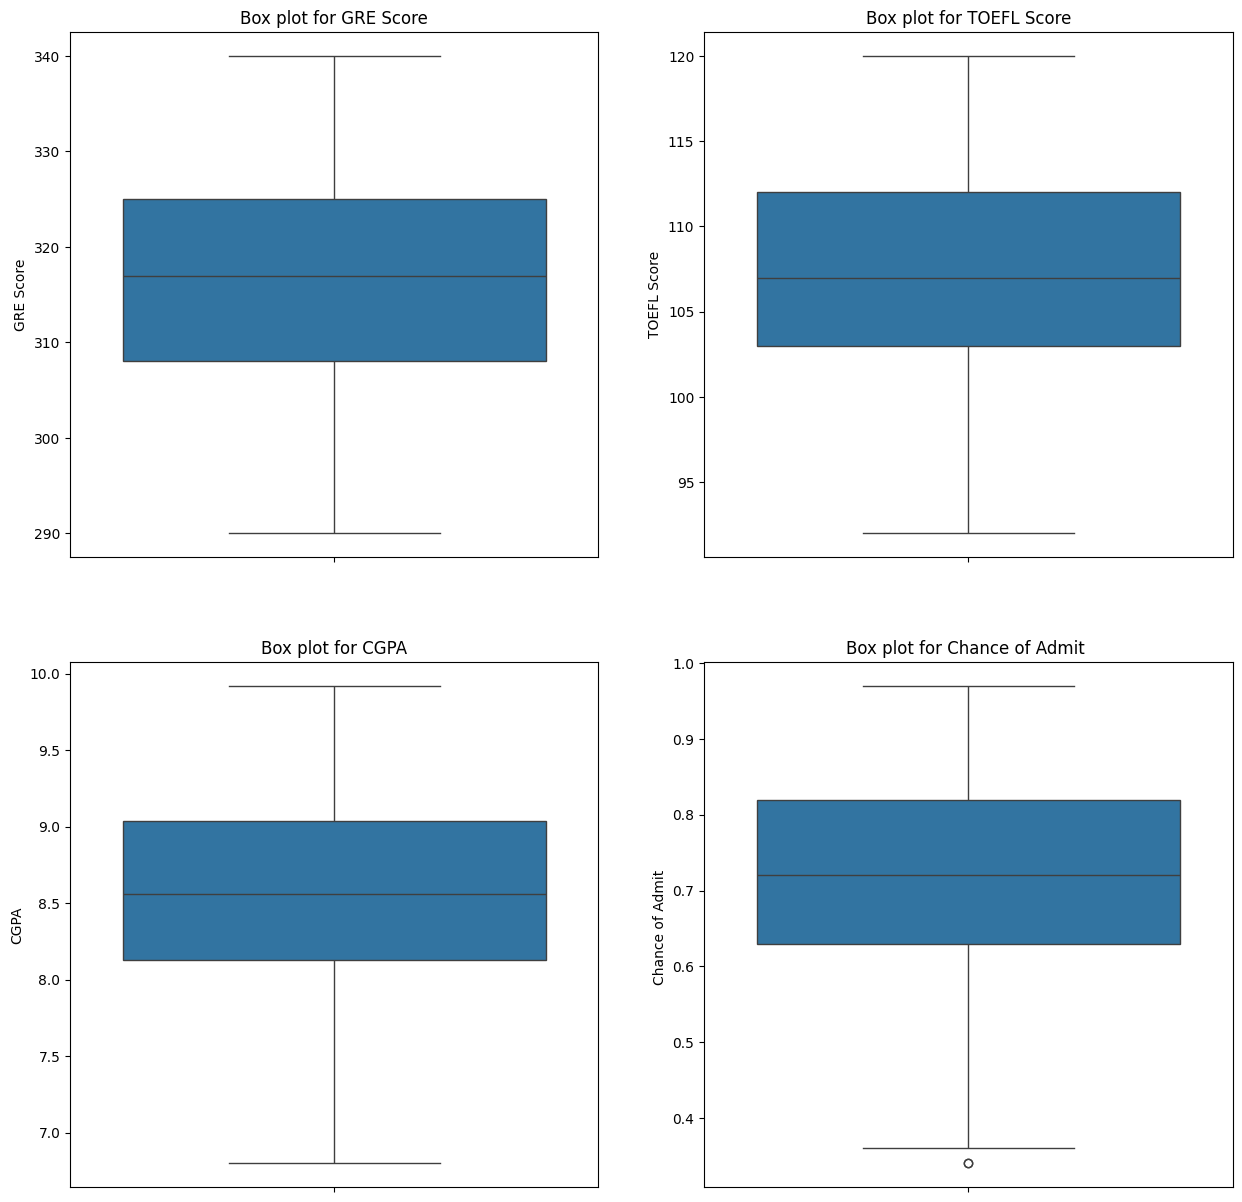

In [125]:
fig=plt.figure(figsize=(15,15))
j=1
for i in cont_col:
    plt.subplot(2,2,j)
    sns.boxplot(df[i])
    plt.title(f'Box plot for {i}')
    j+=1
plt.show()

In [126]:
# Analyzing the outliers
df[df['Chance of Admit ']<0.4]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
58,59,300,99,1,3.0,2.0,6.80,1,0.36
91,92,299,97,3,5.0,3.5,7.66,0,0.38
92,93,298,98,2,4.0,3.0,8.03,0,0.34
94,95,303,99,3,2.0,2.5,7.66,0,0.36
374,375,315,105,2,2.0,2.5,7.65,0,0.39
375,376,304,101,2,2.0,2.5,7.66,0,0.38
376,377,297,96,2,2.5,2.0,7.43,0,0.34
457,458,295,99,1,2.0,1.5,7.57,0,0.37


### Insights:
- There are no outliers except in chance to admit.
- The rows having chance to admit in outlier region are very poor performace hence are necessory in the calculation.

## Correlation among variables

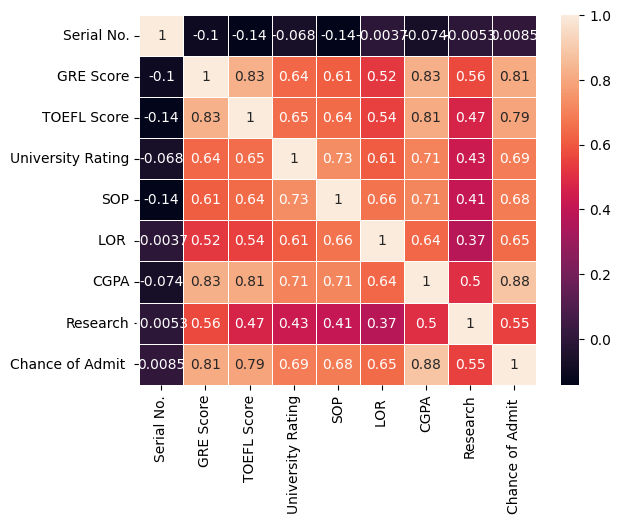

In [127]:
import numpy as np
corr = df.corr()
#fig, ax = plt.subplots(figsize=(8, 8))
#colormap = sns.diverging_palette(220, 10, as_cmap=True)
#dropSelf = np.zeros_like(corr)
#dropSelf[np.triu_indices_from(dropSelf)] = True
#colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, linewidths=.5, annot=True)
plt.show()

### Insights
-  from above heatmap CGPA, GRE Score, Tofel score are highly correlated with target.


#### Feature engineering

In [128]:
# Dropping index column
df.drop('Serial No.',axis=1,inplace=True)

In [129]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


#### Data preparation for modeling

In [130]:
# define feature and target
y= df['Chance of Admit ']
x= df.drop(['Chance of Admit '],axis=1)

In [131]:
# define feature and target
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [132]:
x.shape,y.shape

((500, 7), (500,))

#### Dividing data into three groups Train data, Validation Data and Test Data.

In [133]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [134]:
(x_train.shape,y_train.shape)

((400, 7), (400,))

In [135]:
(x_test.shape,y_test.shape)

((100, 7), (100,))

In [136]:
x_train,x_val,y_train,y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [137]:
# normalizing using mean max scaler
scaler= MinMaxScaler()

In [138]:
scaler.fit(x_train)

MinMaxScaler()

In [139]:
scaler.data_max_

array([340.  , 120.  ,   5.  ,   5.  ,   5.  ,   9.92,   1.  ])

In [143]:
# save the model to disk
file = open('Transform_model.pkl', mode='wb')
pickle.dump(scaler, file)
file.close()

In [160]:
scaler.transform([[315,100,3,4.5,4.5,8.5,1]])

C:\Users\pritamkudale\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.46808511, 0.28571429, 0.5       , 0.875     , 0.85714286,
        0.47601476, 1.        ]])

In [145]:
x_train=scaler.fit_transform(x_train)

In [146]:
x_train

array([[0.59574468, 0.71428571, 0.5       , ..., 0.85714286, 0.64206642,
        1.        ],
       [0.57446809, 0.42857143, 0.5       , ..., 0.28571429, 0.50184502,
        1.        ],
       [0.38297872, 0.42857143, 0.25      , ..., 0.57142857, 0.46863469,
        0.        ],
       ...,
       [0.10638298, 0.21428571, 0.25      , ..., 0.28571429, 0.10701107,
        1.        ],
       [0.59574468, 0.35714286, 0.5       , ..., 0.71428571, 0.66420664,
        1.        ],
       [0.74468085, 0.64285714, 0.75      , ..., 0.28571429, 0.66789668,
        1.        ]])

In [147]:
x_train=pd.DataFrame(x_train, columns=x.columns)

In [148]:
x_val=scaler.transform(x_val)
x_val=pd.DataFrame(x_val, columns=x.columns)

In [149]:
x_test=scaler.transform(x_test)
x_test=pd.DataFrame(x_test, columns=x.columns)

## Model building

### Build the Linear Regression model

In [150]:
model = LinearRegression()

In [152]:
import pickle

In [153]:
# save the model to disk
filename = open('LR_model.pkl',mode='wb')
pickle.dump(model, filename)
filename.close()

In [154]:
model.coef_

array([0.0981492 , 0.09921284, 0.00582219, 0.01381609, 0.06633551,
       0.29044106, 0.033006  ])

In [155]:
model.intercept_

0.4043332679471266

In [156]:
y_hat_train=model.predict(x_train)

In [157]:
y_hat_val=model.predict(x_val)

In [92]:
model.score(x_train, y_train)

0.809467797683702

In [161]:
model.predict([[0.46808511, 0.28571429, 0.5       , 0.875     , 0.85714286,
        0.47601476, 1.        ]])

C:\Users\pritamkudale\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.72174138])

In [95]:
type(x_val)

pandas.core.frame.DataFrame

In [93]:
model.score(x_val, y_val)

0.8533599488294803

#### Insight
- Model is showing significatly good value on validation data.
- There is no significant difference between Train score and Validation score.

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.metrics import mean_squared_error

models = [
           ['Linear Regression :', LinearRegression()],
         
          ['Lasso Regression :', Lasso(alpha=0.1)], 
          ['Ridge Regression :', Ridge(alpha=0.1)] 
          ]

print("Results without removing features with multicollinearity ...")


for name,model in models:
    model.fit(x_train, y_train)
    predictions = model.predict(x_val)
    print(name, (np.sqrt(mean_squared_error(y_val, predictions))))
    print(model.score(x_val, y_val))

Results without removing features with multicollinearity ...
Linear Regression : 0.05184693082934283
0.8533599488294803
Lasso Regression : 0.13579970544887054
-0.006014300123668326
Ridge Regression : 0.05195825255582373
0.8527295644089394


## Linear Regression using Statsmodel library


- Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
- const coefficient is your Y-intercept. It means that if both the Interest_Rate and Unemployment_Rate coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
- Interest_Rate coefficient represents the change in the output Y due to a change of one unit in the interest rate (everything else held constant)
- Unemployment_Rate coefficient represents the change in the output Y due to a change of one unit in the unemployment rate (everything else held constant)
- std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy
- P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant
- Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

In [174]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train.values, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     177.2
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          3.55e-101
Time:                        22:09:13   Log-Likelihood:                 408.76
No. Observations:                 300   AIC:                            -801.5
Df Residuals:                     292   BIC:                            -771.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4043      0.01

In [175]:
x_train_new=x_train.drop(columns='University Rating')
x_train_new.head()

,const,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research
0,1.0,0.595745,0.714286,0.500,0.857143,0.642066,1.0
1,1.0,0.574468,0.428571,0.500,0.285714,0.501845,1.0
2,1.0,0.382979,0.428571,0.375,0.571429,0.468635,0.0
3,1.0,0.617021,0.607143,0.875,0.571429,0.586716,0.0
4,1.0,0.382979,0.428571,0.875,0.857143,0.450185,0.0


In [176]:
x_val_new=x_val.drop(columns='University Rating')
x_val_new.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research
0,0.893617,0.892857,1.000,1.000000,0.867159,1.0
1,0.702128,0.714286,0.625,0.428571,0.697417,1.0
2,0.127660,0.142857,0.125,0.142857,0.239852,0.0
3,0.425532,0.321429,0.375,0.428571,0.306273,0.0
4,0.021277,0.107143,0.125,0.000000,0.158672,0.0


In [177]:
x_test_new=x_test.drop(columns='University Rating')
x_test_new.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research
0,0.872340,0.857143,0.750,0.571429,0.859779,1.0
1,0.446809,0.571429,0.875,0.714286,0.675277,1.0
2,0.468085,0.464286,0.250,0.285714,0.162362,0.0
3,0.404255,0.607143,0.500,0.428571,0.546125,0.0
4,0.702128,0.714286,0.625,0.428571,0.678967,1.0


In [178]:
model1 = sm.OLS(y_train.values, x_train_new).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     207.4
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.45e-102
Time:                        22:09:13   Log-Likelihood:                 408.72
No. Observations:                 300   AIC:                            -803.4
Df Residuals:                     293   BIC:                            -777.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4040      0.011     37.026      

In [179]:
x_train_new=x_train_new.drop(columns='SOP')
x_val_new=x_val_new.drop(columns='SOP')
x_test_new=x_test_new.drop(columns='SOP')

In [180]:
model2 = sm.OLS(y_train.values, x_train_new).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     249.2
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.87e-103
Time:                        22:09:13   Log-Likelihood:                 408.48
No. Observations:                 300   AIC:                            -805.0
Df Residuals:                     294   BIC:                            -782.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4058      0.011     38.366      

### Insights:
- R squared and adjusted R squared value are good in all three condition.
- As the P value of University Rating and SOP is significantly high Those columns are removed.
- Dropping those two feature has no significant difference on the R squared hence reducing whose dimension is good decision.

## VIF(Variance Inflation Factor)

- “ VIF score of an independent variable represents how well the variable is explained by other independent variables. 

- So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.

In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset,col):
  dataset=dataset.drop(columns=col,axis=1)
  vif=pd.DataFrame()
  vif['features']=dataset.columns
  vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
  return vif

In [182]:
calculate_vif(x_train_new,[])

,features,VIF_Value
0,const,8.556625
1,GRE Score,5.068001
2,TOEFL Score,3.922790
3,LOR,1.610825
4,CGPA,4.470813
5,Research,1.580349


### Insights
- VIF looks fine and hence, we can go ahead with the predictions
- All score are 5 or less than 5 hence there is no multicollinearity among the features.
- Constant is just added for OLS so it is not needed for sklearn linear regression.


In [183]:
#Prediction from the clean model
x_val_new = sm.add_constant(x_val_new)
pred = model2.predict(x_val_new)



In [184]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

print('Mean Absolute Error ', mean_absolute_error(y_val.values,pred) )
print('Root Mean Square Error ', np.sqrt(mean_squared_error(y_val.values,pred) ))

Mean Absolute Error  0.038852120031784676
Root Mean Square Error  0.051798188709818505


## Mean of Residuals

In [185]:
residuals = y_val.values-pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.00729594295119134


## Test for Homoscedasticity 

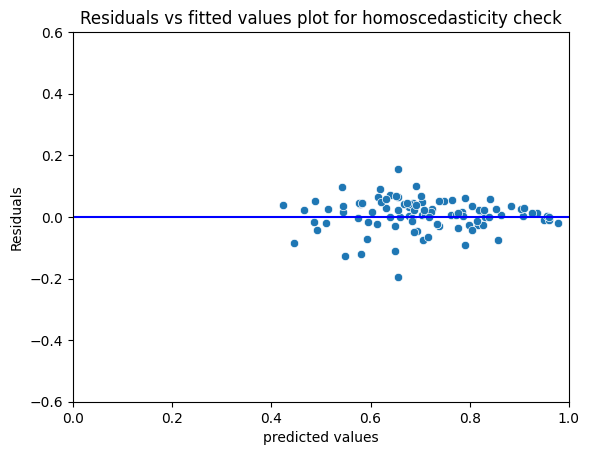

In [186]:
p = sns.scatterplot(x=pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.6,0.6)
plt.xlim(0,1)
p = sns.lineplot(x=[0,26],y=[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [187]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x_val)
lzip(name, test)

[('F statistic', 1.2240374393517293), ('p-value', 0.25513726881010645)]

### Here null hypothesis is - error terms are homoscedastic and since p-values >0.05, we fail to reject the null hypothesis

## Normality of residuals

C:\Users\pritk\AppData\Local\Temp\ipykernel_10472\3645886151.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


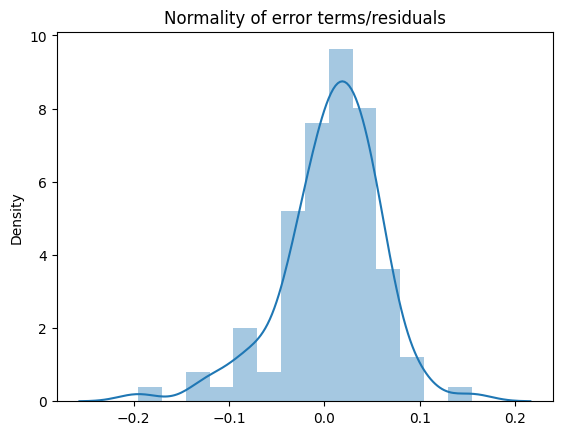

In [188]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.show()

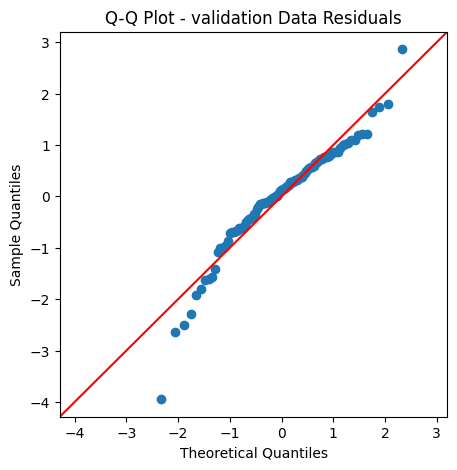

In [210]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))

sm.qqplot(residuals, line='45', fit=True, ax=axes)
axes.set_title('Q-Q Plot - validation Data Residuals')


plt.show()

### Insight
- We can say that Residual has normal distribution 

Text(0, 0.5, 'y_pred')

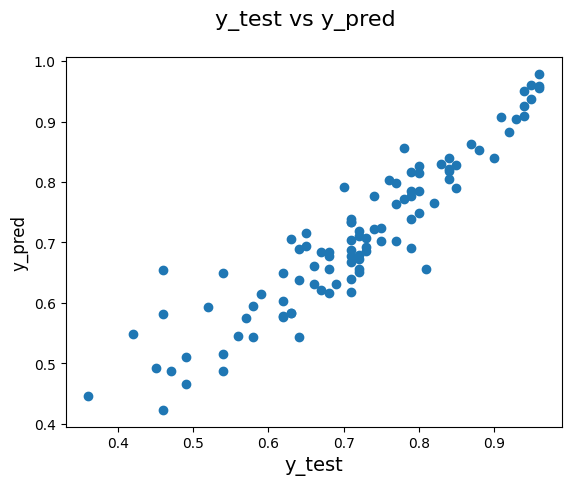

In [189]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_val.values, pred)
fig.suptitle('y_test vs y_pred', fontsize=16)              # Plot heading 
plt.xlabel('y_test', fontsize=14)                          # X-label
plt.ylabel('y_pred', fontsize=12)                          # Y-label

## Retesting Model with removed feature and Without any multicolinearity

In [190]:
x_train_new=x_train_new.drop(columns=['const'])

In [191]:
x_val_new=x_val_new.drop(columns=['const'])

In [192]:
model3 = LinearRegression()
model3.fit(x_train_new,y_train)
models = [['Linear Regression :', LinearRegression()],
          ['Lasso Regression :', Lasso(alpha=0.1)], 
          ['Ridge Regression :', Ridge(alpha=0.1)] ]

print("Results with removing features without multicollinearity on Validation Data")

for name,model in models:
    model.fit(x_train_new, y_train)
    predictions = model.predict(x_val_new)
    print(name, (np.sqrt(mean_squared_error(y_val, predictions))))
    print('Model score',model.score(x_val_new, y_val))

Results with removing features without multicollinearity on Validation Data
Linear Regression : 0.05179818870981841
Model score 0.8536355364882292
Lasso Regression : 0.13579970544887054
Model score -0.006014300123668326
Ridge Regression : 0.05190202062207243
Model score 0.8530481594248294


## Final score on Test Data

In [193]:
model3 = LinearRegression()
model3.fit(x_train_new,y_train)
models = [['Linear Regression :', LinearRegression()],
          ['Lasso Regression :', Lasso(alpha=0.1)], 
          ['Ridge Regression :', Ridge(alpha=0.1)] ]

print("Results with removing features without multicollinearity on test data")

for name,model in models:
    model.fit(x_train_new, y_train)
    predictions = model.predict(x_test_new)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))
    print('Model score',model.score(x_test_new, y_test))

Results with removing features without multicollinearity on test data
Linear Regression : 0.06135564639085773
Model score 0.8159161200958449
Lasso Regression : 0.14376731200102477
Model score -0.010711002444987683
Ridge Regression : 0.06147929371739456
Model score 0.8151734202450039


## Bias-Variance Tradeoff

- Bias is as a result of over simplified model assumptions
- Variance occurs when the assumptions are too complex

# Insights and Recommendation

- University Rating, and SOP are not contributing much on target heence can be dropped from the calculation.

- The Regulerasation in this case has very small imapact on the result hence score is not improved in validaion and testing.

- Other factors such as Research and University ratings are also there but they are not contributing much to the Chance of Admit.

- The target variable Chance of Admit, is mostly dependent on many features like CGPA, GRE Score, TOEFL Score and SOP-LOR.

- The factor which mostly influences the Admit chance is the CGPA.

- Also, there are certain students who have done research and have high university ratings they have a high Chance of Admit.

- During model creation, the best score by ridge and lasso was almost same and was around 81% on training data and 83% on validation data.
  
- Students which have great Chance of Admit have a CGPA around or above 8.5, and also a good GRE Score.

- The features are concentrated within a specified range, they dont have any outlier data points.

## RECOMMENDATIONS

- Emphasize CGPA: Since CGPA is identified as the most influential factor in determining the Chance of Admit, special attention should be given to this feature during model building and analysis.

- Focusing on Key Features: Given that the Chance of Admit is mostly dependent on features like CGPA, GRE Score, TOEFL Score, and SOP-LOR, it's important to focus the analysis on these key features. These features should be prioritized during feature selection and model building.

- Considering Research and University Ratings: Although Research and University ratings may not contribute significantly to the Chance of Admit individually, they still play a role in certain cases. It's important to consider them as additional factors in the analysis, especially for students with high university ratings and research experience.

- Exploring Feature Interactions: Investigating potential interactions between features, especially for students with high Chance of Admit. It may be beneficial to examine how different combinations of features contribute to the overall likelihood of admission.

- Segmentation Analysis: Conducting segmentation analysis to identify groups of students with similar characteristics and Chance of Admit. This can help tailoring admission strategies and identifying specific target groups for recruitment efforts.

- Continuous Monitoring and Improvement: Continuously monitoring the model performance by updating the model with new data and refining the feature selection process can help maintain its effectiveness over time.
  
- Ensure Model Robustness: Since the Ridge and Lasso models produced almost similar scores, it's essential to ensure the robustness of the models and validate their performance on independent datasets.
